# Lecture 14: Fast Fourier Transform (FFT)
0. Little bit of white board stuff
1. Make a simple DFT
2. FFT
3. Examples

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def my_dft(f, N, dt):
    """
    My own Discrete Fourier Transform function. Finds the Fourier transform of sin with period T
    over one period. 
    
    Inputs
    ----------
    T:  Period of the sin wave
    N:  Number of data points in that wave
    """

    t = np.linspace(0, N*dt, N)
    y = np.sin(2*np.pi*f*t)
    
    g = []
    for n in range(len(y)):
        gn = 0
        for m in range(N):
            gn += y[m]*np.exp(-(1j*2*np.pi*m*n)/N)
        g.append(gn)
        
    # Make a plot of the function we're taking the DFT off
    #plt.plot(t, y, 'x--')
    #plt.xlabel('Time (s)')
    return t, y, g

In [7]:
N = 5
dt = 1.25
t,f,g = my_dft(1, N, dt)
print(g)

[(0.40054381631017155+0j), (0.3661341500475268+0.35634038644171606j), (-0.5664060582026134+2.363881091763873j), (-0.5664060582026116-2.363881091763874j), (0.3661341500475272-0.3563403864417156j)]


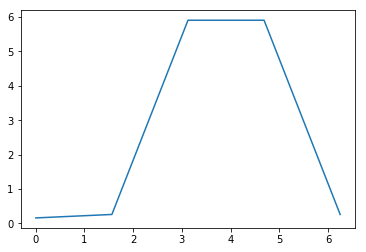

In [8]:
# Plot mod^2 DFT output
plt.plot(t, np.abs(g)**2)

This doesn't look right, what do we expect to get?. We should get a delta function at the frequency of the sine wave. So why don't we?
.

.

.

.

.

.

.

.

.

.

.

.  
      
The output of the function is in frequency not time, so we need to make sure we convert the output into the frequency values that it should have. To do this we'll just use a prebuilt numpy command

    np.fft.fftfreq(number of data points, spacing between the data points)

In [9]:
nu = np.fft.fftfreq(N, dt)
print(nu)

[ 0.    0.16  0.32 -0.32 -0.16]


Text(0.5, 0, 'Frequency (Hz)')

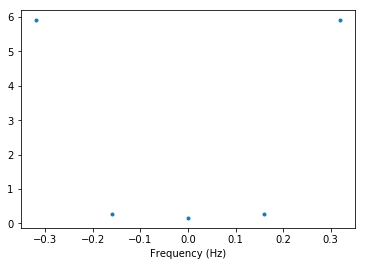

In [10]:
plt.plot(nu, np.abs(g)**2,'.')
plt.xlabel('Frequency (Hz)')

STILL doesn't look right... why?
.

.

.

.

.

.

.

.

Nyquist Frequency is given by 1/2dt, for our problem this is,

In [11]:
1/(2*dt)

0.4

Frequencies higher than this cannot be found with our step size,

In [12]:
N = 5
dt = 0.2
t,y,g = my_dft(1, N, dt)

[ 0.  1.  2. -2. -1.]
2.5


Text(0.5, 0, 'Frequency (Hz)')

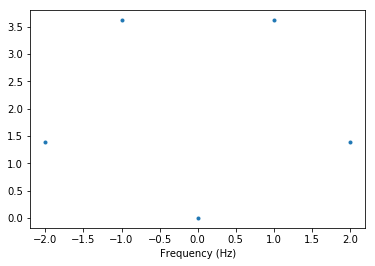

In [13]:
nu = np.fft.fftfreq(N, dt)
print(nu)
print(1/(2*dt))
plt.plot(nu, np.abs(g)**2,'.')
plt.xlabel('Frequency (Hz)')

### Lets try different things

In [14]:
def my_dft2(f, N, dt):
    """
    My own Discrete Fourier Transform function. Finds the Fourier transform of sin with period T
    over one period. 
    
    Inputs
    ----------
    T:  Period of the sin wave
    N:  Number of data points in that wave
    """
    if f > 1/(2*dt):
        print("Frequency is too high for the sampling rate, either decrease frequency or decrease dt")
        return
    print('Nyquist Frequency', 1/(2*dt))
    
    # Get a set of data points
    t = np.linspace(0, N*dt, N)
    y = np.sin(2*np.pi*f*t)
    
    # The total signal to plot for reference
    t_real = np.linspace(0, N*dt, N*50)
    y_real = np.sin(2*np.pi*f*t_real)
    
    # Take the DFT of 'y'
    g = []
    for n in range(len(y)):
        gn = 0
        for m in range(N):
            gn += y[m]*np.exp(-(1j*2*np.pi*m*n)/N)
        g.append(gn)
        
    # Turn our time series into frequency
    nu = np.fft.fftfreq(N, dt)
    g = np.array(g)
    
    # Make a plot of the function we're taking the DFT off
    plt.figure(1, figsize = (8,4))
    plt.plot(t, y, 'x--')
    plt.plot(t_real, y_real, alpha = 0.5) # Full function for reference
    plt.title('Sine Wave with frequency {}'.format(f))
    plt.xlabel('Time (s)')
    
    # Shift the DFT values so that 0 is in the middle
    nu = np.fft.fftshift(nu)
    g = np.fft.fftshift(g)
    
    plt.figure(2, figsize = (8,4))
    plt.plot(nu, np.abs(g)**2,'.--') # Divide by N to make sure things scale ok. 
    plt.title('DFT of sin(2$\pi${}t)'.format(f))
    plt.xlabel('Frequency (Hz)')
    plt.vlines([f,-f], 0, max(np.abs(g)**2)) # Add a vertical line at the frequency
    plt.show()
    return t,nu, y, g

Nyquist Frequency 2.5


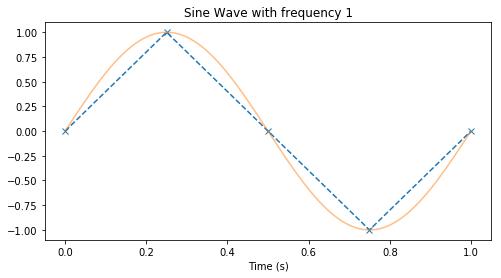

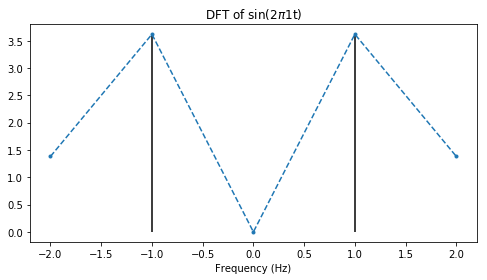

In [15]:
ans = my_dft2(1,5,0.2)

Nyquist Frequency 5.0


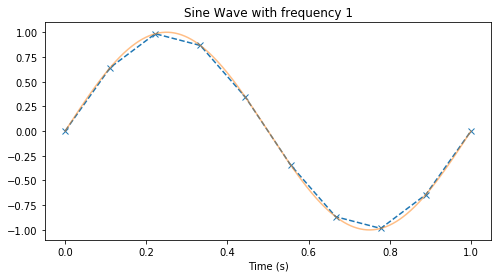

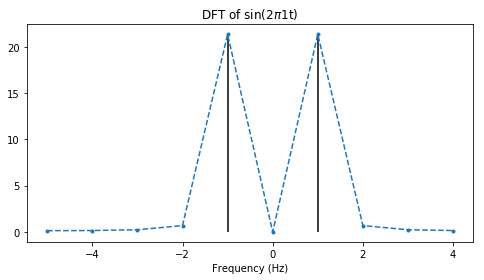

Nyquist Frequency 2.5


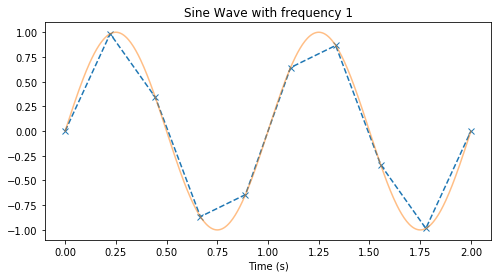

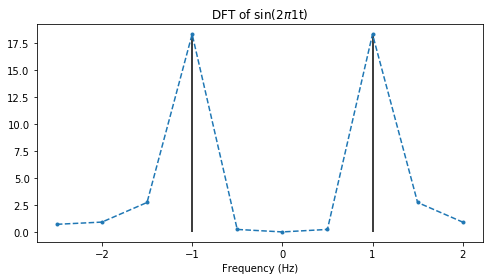

In [16]:
# What will make our answer better. Smaller steps or more observations?
ans = my_dft2(1,10,0.1)
ans = my_dft2(1,10,0.2)

Nyquist Frequency 14.285714285714285


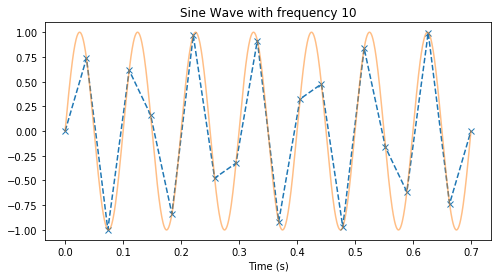

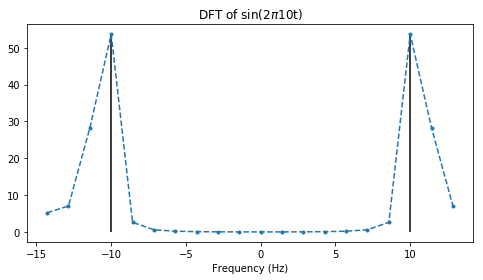

In [17]:
a = my_dft2(10, 20, 0.035)

## What about the "Fast" part?
The DFT is painfully slow, it might not look like it but that's just because we've been dealing with small data sets.

In [18]:
run_times = []
for N in [10,20,40,80,160,320]:
    t_foo = %timeit -o my_dft(1, N, 0.01)
    run_times.append(t_foo.average)


644 µs ± 5.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.41 ms ± 6.01 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.35 ms ± 20 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
42.7 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
150 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
589 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0, 0.5, 'Time it takes "my_dft" to run')

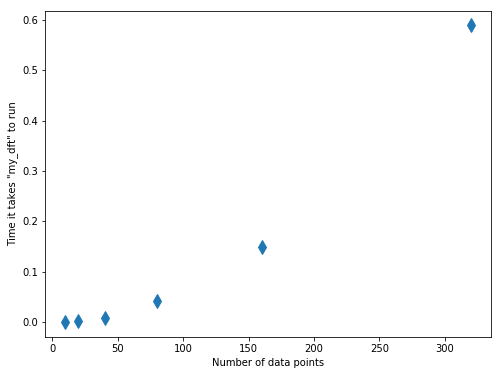

In [19]:
fig = plt.figure(figsize = (8,6))
#plt.title('Error vs. Run time for euler_1d solving sky_diver', size = 14)
plt.plot([10,20,40,80,160,320],run_times ,'d', markersize = 10)
plt.xlabel('Number of data points')
plt.ylabel('Time it takes "my_dft" to run')

In [20]:
run_times_fft = []
for N in [10,20,40,80,160,320]:
    t,y,g = my_dft(1, N, 0.01)
    t_foo = %timeit -o np.fft.fft(y)
    run_times_fft.append(t_foo.average)


2.6 µs ± 21.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.85 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.99 µs ± 38.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.52 µs ± 12.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.86 µs ± 62 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.16 µs ± 63.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


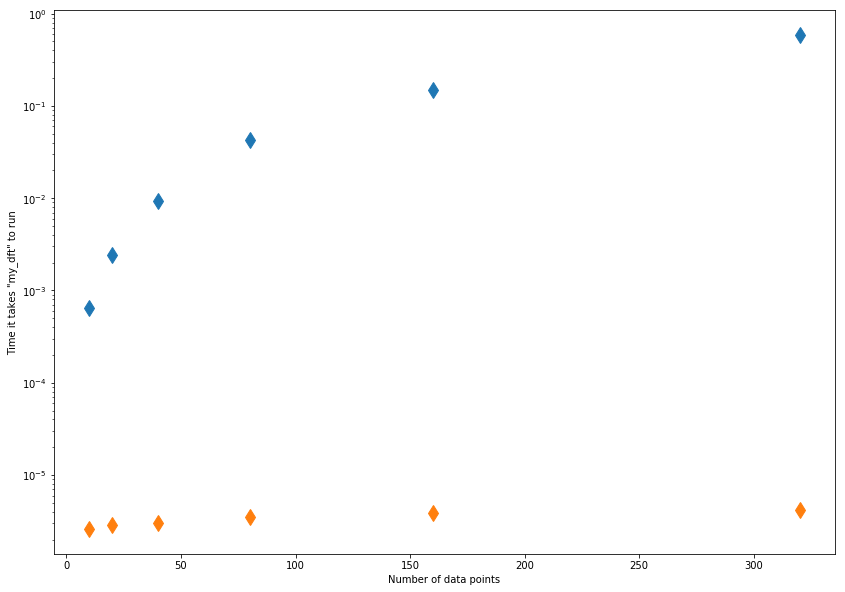

In [21]:
fig = plt.figure(figsize = (14,10))
#plt.title('Error vs. Run time for euler_1d solving sky_diver', size = 14)
plt.plot([10,20,40,80,160,320],run_times ,'d', markersize = 12)
plt.plot([10,20,40,80,160,320],run_times_fft ,'d', markersize = 12)
plt.xlabel('Number of data points')
plt.ylabel('Time it takes "my_dft" to run')
plt.yscale('log')

The Fast Fourier Transform uses a lot of symmitry and tricks to be able to calculate the coefficents much faster.
So from now on lets just use that

In [32]:
def my_fft(f, N, dt):
    """
    Similar to my_dft2, but uses numpy's fft.

    Inputs
    ----------
    T:  Period of the sin wave
    N:  Number of data points in that wave
    """

    t = np.linspace(0, N*dt, N)
    y = np.sin(2*np.pi*f*t)
    t_real = np.linspace(0, N*dt, N*50)
    y_real = np.sin(2*np.pi*f*t_real)
    
    g = np.fft.fft(y)/N
    nu = np.fft.fftfreq(N, dt)
    
    g = np.fft.fftshift(g)
    nu = np.fft.fftshift(nu)
    # Make a plot of the function we're taking the DFT off
    plt.figure(1, figsize = (8,4))
    plt.plot(t, y, 'x--')
    plt.plot(t_real, y_real, alpha = 0.5)
    plt.title('Sine Wave with frequency {}'.format(f))
    plt.xlabel('Time (s)')
    
    # Plot the DFT
    plt.figure(2, figsize = (8,4))
    plt.plot(nu, np.abs(g)**2,'.--') # Divide by N to make sure things scale ok. 
    plt.title('FFT of sin(2$\pi${}t)'.format(f))
    plt.xlabel('Frequency (Hz)')
    plt.vlines([f,-f], 0, max(np.abs(g)**2)) # Add a vertical line at the frequency
    plt.show()
    return t,nu, y, g

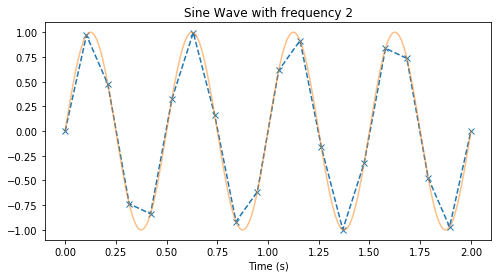

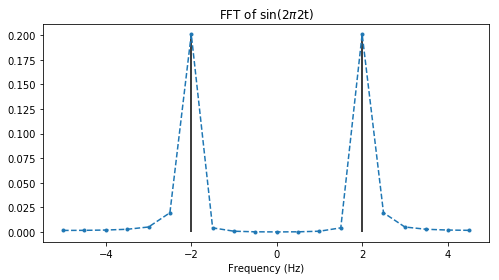

Nyquist Frequency 5.0


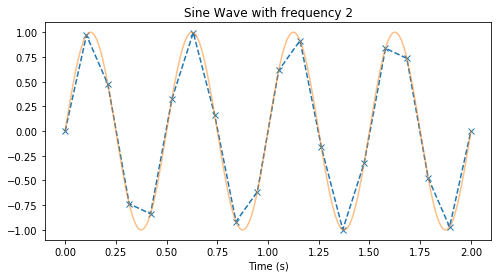

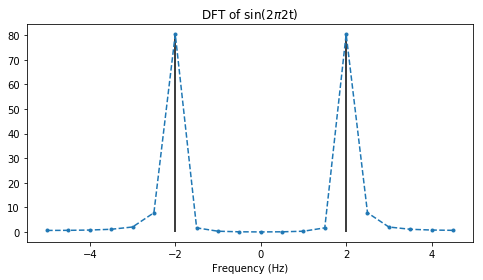

In [33]:
fans = my_fft(2, 20, 0.1)
sans = my_dft2(2, 20, 0.1)

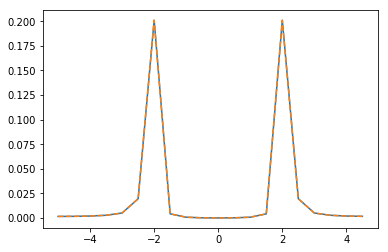

In [81]:
plt.plot(fans[1], np.abs(fans[3])**2)
plt.plot(sans[1], np.abs(sans[3]/len(sans[3]))**2, '--')

# What about other functions?

In [35]:
def my_fft2(N, dt, func):
    """
    My own Discrete Fourier Transform function. Finds the Fourier transform of sin with period T
    over one period. 

    Inputs
    ----------
    T:  Period of the sin wave
    N:  Number of data points in that wave
    """
    print('Nyquest Frequency:', 1/(2*dt))
    
    t = np.linspace(0, N*dt, N)
    y = func(t)
    t_real = np.linspace(0, N*dt, N*50)
    y_real = func(t_real)
    
    # Take the FFT of y
    g = np.fft.fft(y)/N
    nu = np.fft.fftfreq(N, dt)
    
    # Shift the FFT result so that 0 is in the middle
    g = np.fft.fftshift(g)
    nu = np.fft.fftshift(nu)
    
    # Make a plot of the function we're taking the DFT off
    plt.figure(1, figsize = (8,4))
    plt.plot(t, y, 'x--')
    plt.plot(t_real, y_real, alpha = 0.5)
    plt.title('Sine Wave with frequency {}'.format(f))
    plt.xlabel('Time (s)')
    
    # Plot the Real part of the coefficents
    fig, ax = plt.subplots(3,1, figsize = (8,10))
    ax[0].plot(nu, np.real(g),)
    ax[0].set_ylabel('Real(g)')
    ax[0].set_title("Real Part")
    
    # Plot the imaginary part of the coefficents
    ax[1].plot(nu, np.imag(g), )
    ax[1].set_ylabel('Im(g)')
    ax[1].set_title('Imaginary Part')
    
    # Plot the power spectra ||^2 of the coefficents
    ax[2].plot(nu, np.abs(g)**2,) # Divide by N to make sure things scale ok. 
    ax[2].set_title('Power Spectra')
    ax[2].set_xlabel('Frequency (Hz)')
    plt.show()
    return t,nu, y, g

In [36]:
def other_function(t):
    return 3*np.cos(2*np.pi*4*t) + 2*np.sin(2*np.pi*10*t)

Nyquest Frequency: 25.0


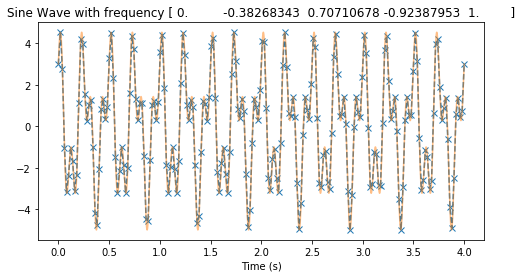

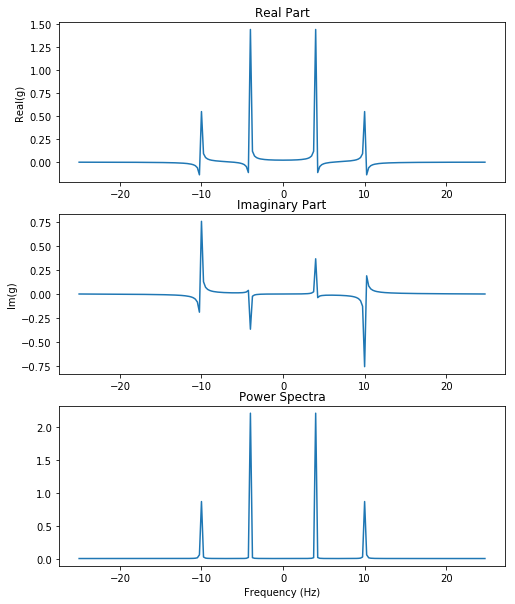

In [37]:
ans = my_fft2(200, 0.02, other_function)

Nyquest Frequency: 55.55555555555556


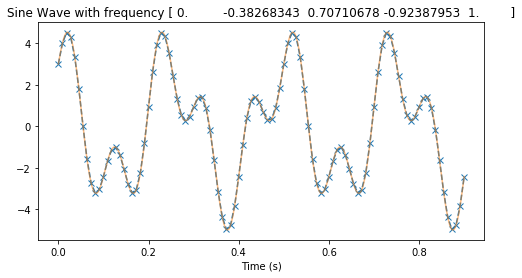

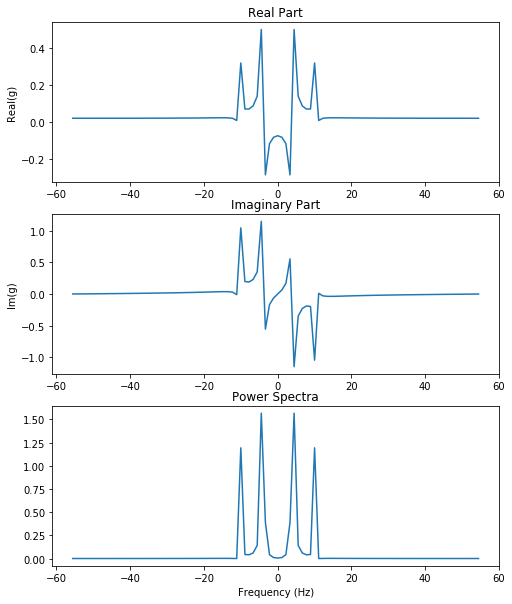

In [38]:
# Change step size to 0.009, rather than 0.01 and see what happens?
ans = my_fft2(100, 0.009, other_function)

This is because the data doesn't come out to be periodic. The FFT is assuming what you're giving it is periodic, and when it's not it has some problems, but the power pectra still comes out to be fine.

# Homework 8
Back in homework 8 we used a loud chaotic noise to mask a sine wave signal we wanted to send. In that homework I said that the noise had to be much louder than the singal, why?

That's because an FFT can easily get rid of any noise in a signal. Lets try to figure out the frequency of the sine wave used when the chaos was much louder than the signal

In [39]:
# Read in the data
lorenz_loud = pd.read_csv("Lorenz_Data_loud.csv")
lorenz_loud

,Unnamed: 0,t,s
0,0,0.000,0.000000
1,1,0.001,0.017121
2,2,0.002,0.033985
3,3,0.003,0.050608
4,4,0.004,0.067005
5,5,0.005,0.083190
6,6,0.006,0.099176
7,7,0.007,0.114978
8,8,0.008,0.130609
9,9,0.009,0.146080


In [40]:
s = lorenz_loud['s']
t = lorenz_loud['t']
fs = np.fft.fft(s)
nu = np.fft.fftfreq(len(t), t[1]-t[0])
fs = np.fft.fftshift(fs)
nu = np.fft.fftshift(nu)

(-10, 10)

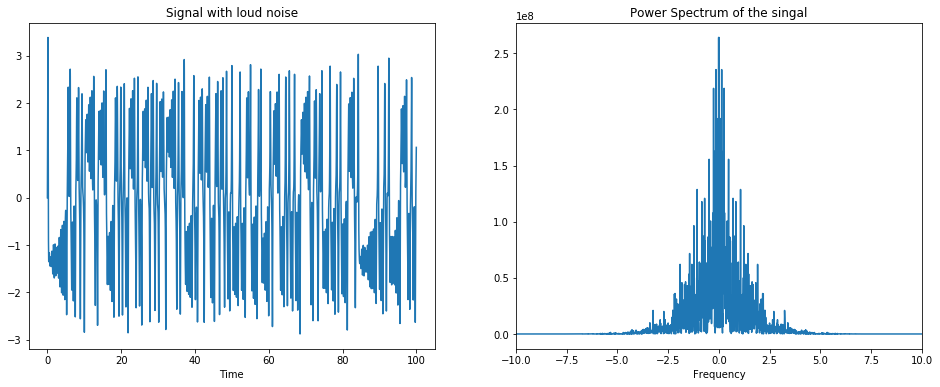

In [41]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
ax[0].plot(t,s)
ax[0].set_title("Signal with loud noise")
ax[0].set_xlabel('Time')

ax[1].plot(nu, np.absolute(fs)**2)
ax[1].set_title('Power Spectrum of the singal')
ax[1].set_xlabel('Frequency')
ax[1].set_xlim(-10,10)

What frequency is the sine wave?

In [42]:
# Read in the data
lorenz_quiet = pd.read_csv("Lorenz_Data_quiet.csv")
s = lorenz_quiet['s']
t = lorenz_quiet['t']
fs = np.fft.fft(s)
nu = np.fft.fftfreq(len(t), t[1]-t[0])
fs = np.fft.fftshift(fs)
nu = np.fft.fftshift(nu)

(-10, 10)

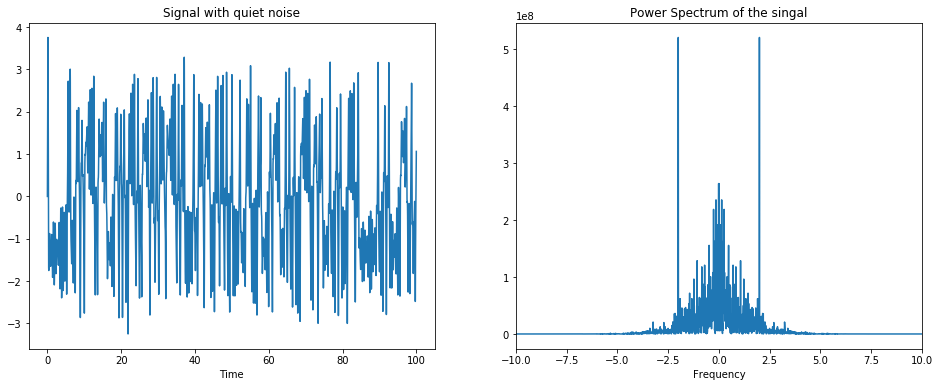

In [45]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
ax[0].plot(t,s)
ax[0].set_title("Signal with quiet noise")
ax[0].set_xlabel('Time')

ax[1].plot(nu, np.absolute(fs)**2)
ax[1].set_title('Power Spectrum of the singal')
ax[1].set_xlabel('Frequency')
ax[1].set_xlim(-10,10)

# Convolution and Correlation
The DFT has the same kinds of rules as the normal FT.

Convolution: DFT[f * g] = $\tilde{f}$$\tilde{g}$
\begin{equation}
f * g = \int_{-\infty}^{\infty}f(x)g(z-x)dx
\end{equation}


Correlation: DFT[f $\otimes$ g] =  $\tilde{f}^{*}$$\tilde{g}$
\begin{equation}
f \otimes g = \int_{-\infty}^{\infty}f^*(x)g(z-x)dx
\end{equation}

Lots of casses where we are interested in the deconvolution of something, we know f*g but and we know g(t) but we want to know what f(t) is, we can use this convolution relation to f(t)
\begin{equation}
    f(t) = \mathscr{F}^{-1}\big[\frac{\mathscr{F}[f*g]}{\mathscr{F}g(t)}\big]
\end{equation}

As an example lets say I have a simple RC circuit. If I apply an input voltage, the output, wont be the input, but the input convoluted with the responce of the input, the responce for an RC circuit can be described as, 
\begin{equation}
r(t) = \frac{1}{RC}e^{-t/RC}
\end{equation}
The output we will  measure is $V_{in}(t)*r(t)$. With a known responce $r(t)$ and a measured $V_{out} = V_{in}(t)* r(t)$

In [86]:
dt = 0.1
N = 200
t = np.linspace(0, N*dt, N)
print(1/(2*dt))

5.0


Thid comes from solving the differential

\begin{equation}
\frac{dV_{out}}{dt} + \frac{V_{out}}{RC} = \frac{V_{in}}{RC}
\end{equation}

I picked $V_{in}$ to be a sine wave, and using Mathematica to solve this I got the function in vout

In [87]:
def vout(f,t, RC):
    A = np.exp(-t/RC)
    B = 2*f*np.pi*RC - 2*np.exp(t/RC)*f*np.pi*RC*np.cos(2*f*np.pi*t) + np.exp(t/RC)*np.sin(2*f*np.pi*t)
    C = 1 + 4*f**2 * np.pi**2*RC**2
    return A * B / C

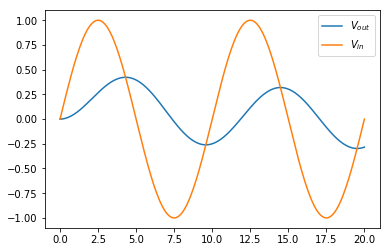

In [93]:
f = 0.1
RC = 5
v = vout(f,t,RC)
plt.plot(t,v,label = '$V_{out}$')
plt.plot(t, np.sin(2*np.pi*f*t),label = '$V_{in}$')
plt.legend()

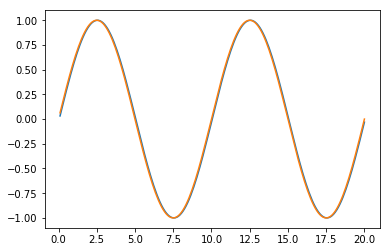

In [94]:
fvout = np.fft.fft(v)
r = np.exp(-t/RC)/RC
fr = np.fft.fft(r)
fr = fr/fr[0]   # Dividing by fr[0] is a normalization trick. Take away this line and you'll see that the
                # Answer is the same frequency, but the magnitude of the sine wave is too small
vin = np.fft.ifft(fvout/fr)
plt.plot(t[1:],vin[1:])
plt.plot(t[1:], np.sin(2*np.pi*f*t[1:]),)